In [ ]:
!pip install --upgrade -q kaggle 
!mkdir /root/.kaggle
import json 
token = {
    
    "username": "ifrahandleeb",
    "key": "7d32d51ce48e80317141c1a4fc7c3c23"
    
}

with open('/root/.kaggle/kaggle.json' , 'w') as config_file:

  json.dump(token , config_file)

!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 91% 79.0M/86.8M [00:00<00:00, 85.4MB/s]
100% 86.8M/86.8M [00:01<00:00, 77.9MB/s]


In [ ]:
import zipfile 
zip_ref = zipfile.ZipFile("/content/brain-tumor-classification-mri.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pathlib 
import numpy as np 
data_dir = pathlib.Path("/content/Training")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[0:]
print(class_names)

['glioma_tumor' 'meningioma_tumor' 'no_tumor' 'pituitary_tumor']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 
import os

def view_random_image(target_dir , target_class):

  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder) , 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"image shape : {img.shape}")

  return img

['gg (557).jpg']
image shape : (512, 512, 3)


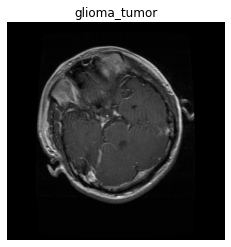

In [ ]:
img = view_random_image(target_dir = "/content/Training/" , 
                        target_class = "glioma_tumor")

['m1(99).jpg']
image shape : (354, 298, 3)


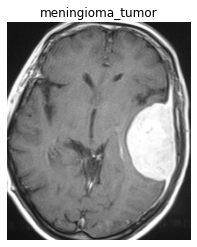

In [ ]:
img = view_random_image(target_dir = "/content/Training/" , 
                        target_class = "meningioma_tumor")

['p (190).jpg']
image shape : (512, 512, 3)


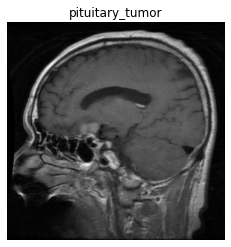

In [ ]:
img = view_random_image(target_dir = "/content/Training/" , 
                        target_class = "pituitary_tumor")

['image(183).jpg']
image shape : (424, 417, 3)


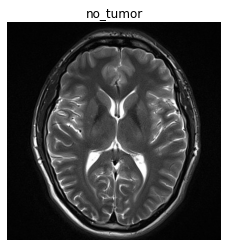

In [ ]:
img = view_random_image(target_dir = "/content/Training/" , 
                        target_class = "no_tumor")

In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/Training"
test_dir = "/content/Testing"

train_data = train_datagen.flow_from_directory(directory = train_dir , 
                                               batch_size = 32 , 
                                               target_size=(224 , 224) , 
                                               class_mode= "categorical" ,
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory = test_dir , 
                                               batch_size = 32 , 
                                               target_size=(224 , 224) , 
                                               class_mode= "categorical" ,
                                               seed=42)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
checkpoint_path = "model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path , 
                                                         save_weights_only = True , 
                                                         monitor = "val_accuracy" , 
                                                         save_best_only = True)

In [ ]:
from tensorflow.keras.layers import Conv2D , MaxPool2D , Activation , Dense , Flatten
from tensorflow.keras import Sequential 
from tensorflow.keras.optimizers import Adam

In [ ]:
import datetime 
def create_tensorboard_callback(dir_name , experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S)")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"saving to : {log_dir}")
  return tensorboard_callback

MODEL 1 - NO AUGMENTATION - 3 LAYERED MODEL

In [ ]:
model = Sequential ([
                       Conv2D(10 , 3 , activation="relu" ) ,
                       MaxPool2D() ,  
                       Conv2D(10 , 3 , activation="relu") ,
                       MaxPool2D() ,
                       Conv2D(10 , 3 , activation="relu") , 
                       Flatten(), 
                       Dense(4 , activation="sigmoid")
                       
])

In [ ]:
model.compile(loss = "categorical_crossentropy" , 
              optimizer = Adam() , 
              metrics = ["accuracy"])

In [ ]:
history_1 = model.fit(train_data , 
            epochs=5 , 
            steps_per_epoch=len(train_data) , 
            validation_data=test_data , 
            validation_steps=len(test_data) ,
            callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub" , 
                                                                           experiment_name = "3 layered model") 
                                  ])

saving to : tensorflow_hub/3 layered model/20210720-041157)
Epoch 1/5
90/90 [==============================] - 14s 152ms/step - loss: 0.9202 - accuracy: 0.6247 - val_loss: 2.1532 - val_accuracy: 0.4289
Epoch 2/5
90/90 [==============================] - 13s 145ms/step - loss: 0.5371 - accuracy: 0.7955 - val_loss: 1.7743 - val_accuracy: 0.6269
Epoch 3/5
90/90 [==============================] - 12s 137ms/step - loss: 0.3247 - accuracy: 0.8760 - val_loss: 2.0775 - val_accuracy: 0.6929
Epoch 4/5
90/90 [==============================] - 12s 136ms/step - loss: 0.2141 - accuracy: 0.9247 - val_loss: 2.2050 - val_accuracy: 0.7183
Epoch 5/5
90/90 [==============================] - 13s 146ms/step - loss: 0.1158 - accuracy: 0.9669 - val_loss: 2.1555 - val_accuracy: 0.7716


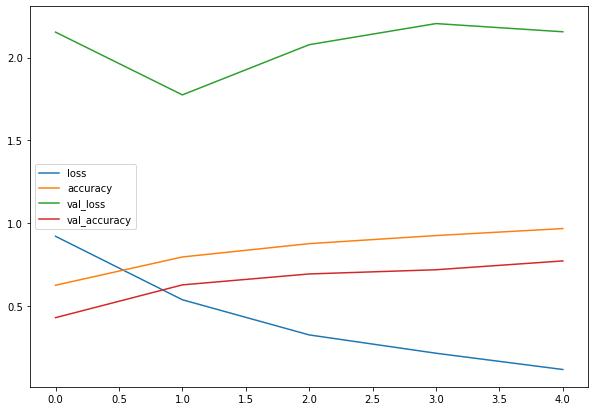

In [ ]:
import pandas as pd 
pd.DataFrame(history_1.history).plot(figsize=(10 , 7)) ;

In [ ]:
def plot_loss_curves(history):

  loss=history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs , loss  , label="Training Loss")
  plt.plot(epochs , val_loss , label="Val Loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs , accuracy  , label="Training Accuracy")
  plt.plot(epochs , val_accuracy , label="Val Accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

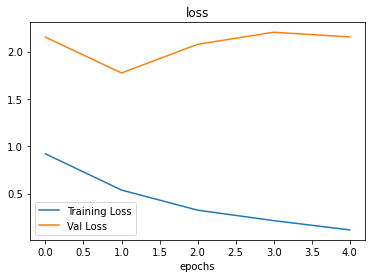

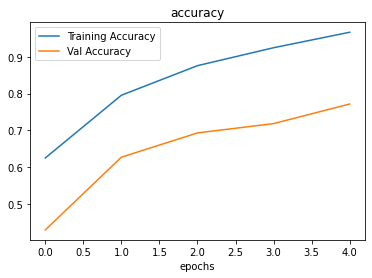

In [ ]:
plot_loss_curves(history_1)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

MODEL -2 : NO DATA AUGMENTAION EFFICIENT B6 

In [ ]:
eff_url = "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1"

In [ ]:
import tensorflow_hub as hub 

In [ ]:
IMG_SHAPE = (224 ,224)
def create_model(model_url , num_classes=43):

  feature_extractor_layer = hub.KerasLayer(model_url , 
                                           trainable = False ,
                                           name="feature_extractor_layer" , 
                                           input_shape = IMG_SHAPE+(3 , ))
  
  model = tf.keras.Sequential([
                               feature_extractor_layer , 
                               layers.Dense(num_classes , activation="softmax" , name = "output_layer")
  ])

  return model

In [ ]:
eff_model = create_model(eff_url , 
                            num_classes=train_data.num_classes)

In [ ]:
eff_model.compile(loss = "categorical_crossentropy" , 
                     optimizer = tf.keras.optimizers.Adam() , 
                     metrics=["accuracy"])

In [ ]:
eff_history = eff_model.fit(train_data , 
                                  epochs = 5 , 
                                  steps_per_epoch = len(train_data) , 
                                  validation_data = test_data , 
                                  validation_steps = len(test_data), 
                                  callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub" , 
                                                                           experiment_name = "Efficientb6") 
                                  ])

saving to : tensorflow_hub/Efficientb6/20210720-042921)
Epoch 1/5
90/90 [==============================] - 56s 397ms/step - loss: 0.7725 - accuracy: 0.7045 - val_loss: 0.9905 - val_accuracy: 0.6041
Epoch 2/5
90/90 [==============================] - 27s 301ms/step - loss: 0.4929 - accuracy: 0.8237 - val_loss: 0.9497 - val_accuracy: 0.6168
Epoch 3/5
90/90 [==============================] - 27s 300ms/step - loss: 0.4189 - accuracy: 0.8533 - val_loss: 0.9599 - val_accuracy: 0.6168
Epoch 4/5
90/90 [==============================] - 27s 298ms/step - loss: 0.3712 - accuracy: 0.8690 - val_loss: 0.9214 - val_accuracy: 0.6523
Epoch 5/5
90/90 [==============================] - 27s 298ms/step - loss: 0.3385 - accuracy: 0.8843 - val_loss: 0.9753 - val_accuracy: 0.6624


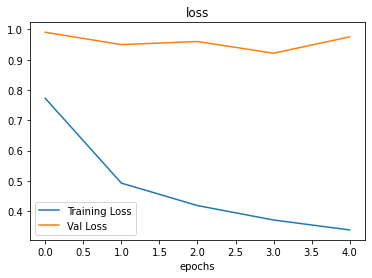

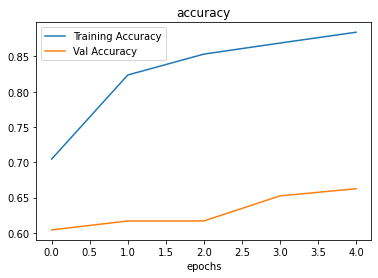

In [ ]:
plot_loss_curves(eff_history)

MODEL - 3 : NO DATA AUGMENTAION 6 LAYERED MODEL

In [ ]:
model_3 = Sequential ([
                       Conv2D(10 , 3 , activation="relu" ) ,
                       MaxPool2D() ,  
                       Conv2D(10 , 3 , activation="relu") ,
                       MaxPool2D() ,
                       Conv2D(10 , 3 , activation="relu") , 
                       MaxPool2D() ,
                       Conv2D(10 , 3 , activation="relu") , 
                       MaxPool2D() ,
                       Conv2D(10 , 3 , activation="relu") , 
                       Flatten(), 
                       Dense(4 , activation="sigmoid")
                       
])

In [ ]:
model_3.compile(loss = "categorical_crossentropy" , 
                     optimizer = tf.keras.optimizers.Adam() , 
                     metrics=["accuracy"])

In [ ]:
history_3 = model_3.fit(train_data , 
                                  epochs = 5 , 
                                  steps_per_epoch = len(train_data) , 
                                  validation_data = test_data , 
                                  validation_steps = len(test_data), 
                                  callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub" , 
                                                                           experiment_name = "5 layered model") 
                                  ])

saving to : tensorflow_hub/5 layered model/20210720-040841)
Epoch 1/5
90/90 [==============================] - 17s 161ms/step - loss: 1.1287 - accuracy: 0.5178 - val_loss: 1.9498 - val_accuracy: 0.3426
Epoch 2/5
90/90 [==============================] - 13s 145ms/step - loss: 0.8051 - accuracy: 0.6714 - val_loss: 2.0112 - val_accuracy: 0.3756
Epoch 3/5
90/90 [==============================] - 13s 144ms/step - loss: 0.6797 - accuracy: 0.7258 - val_loss: 2.3673 - val_accuracy: 0.4594
Epoch 4/5
90/90 [==============================] - 13s 149ms/step - loss: 0.5799 - accuracy: 0.7767 - val_loss: 2.1966 - val_accuracy: 0.5279
Epoch 5/5
90/90 [==============================] - 13s 143ms/step - loss: 0.4975 - accuracy: 0.8108 - val_loss: 1.9126 - val_accuracy: 0.5685


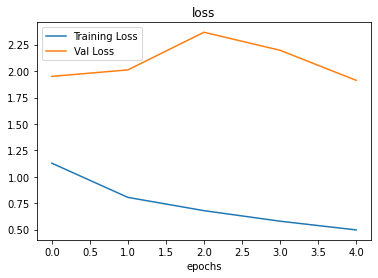

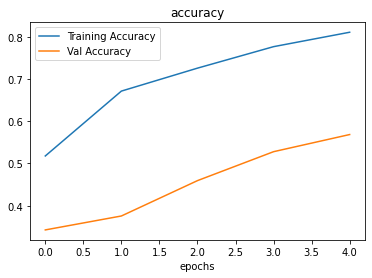

In [ ]:
plot_loss_curves(history_3)

MODEL - 4 : NO DATA AUGMENTATION RESNETV250 

In [ ]:
res_url =  "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub 
from tensorflow.keras import layers

In [ ]:
def create_model(model_url , num_classes=10):


  feature_extractor_layer = hub.KerasLayer(model_url , 
                                           trainable=False, 
                                           name="feature_extractor_layer" , 
                                           input_shape = IMG_SHAPE+(3,))
  
  model= tf.keras.Sequential([
                              feature_extractor_layer , 
                              layers.Dense(num_classes , activation="softmax" , name= "output_layer")
  ])

  return model

In [ ]:
resnet_model = create_model(res_url , 
                            num_classes=train_data.num_classes)

In [ ]:
resnet_model.compile(loss = "categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
resnet_history = resnet_model.fit(train_data , 
                 epochs = 5 , 
                 steps_per_epoch = len(train_data) , 
                 validation_data=test_data , 
                 validation_steps=len(test_data) , 
                 callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub" , 
                                                        experiment_name="resnet50V2")
                 ])

saving to : tensorflow_hub/resnet50V2/20210720-042137)
Epoch 1/5
90/90 [==============================] - 22s 197ms/step - loss: 0.7575 - accuracy: 0.6972 - val_loss: 1.1587 - val_accuracy: 0.5812
Epoch 2/5
90/90 [==============================] - 15s 171ms/step - loss: 0.4357 - accuracy: 0.8481 - val_loss: 1.1000 - val_accuracy: 0.6294
Epoch 3/5
90/90 [==============================] - 15s 164ms/step - loss: 0.3424 - accuracy: 0.8829 - val_loss: 0.9643 - val_accuracy: 0.6574
Epoch 4/5
90/90 [==============================] - 15s 162ms/step - loss: 0.2910 - accuracy: 0.9045 - val_loss: 0.9159 - val_accuracy: 0.6954
Epoch 5/5
90/90 [==============================] - 15s 161ms/step - loss: 0.2512 - accuracy: 0.9157 - val_loss: 0.9024 - val_accuracy: 0.7056


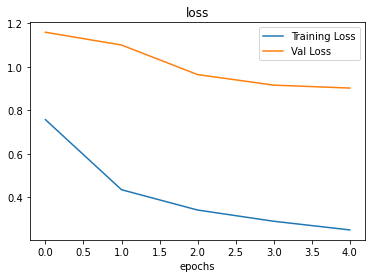

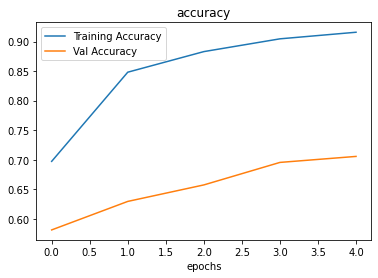

In [ ]:
plot_loss_curves(resnet_history)

MODEL- 5 : DATA AUGMENTAION 3 LAYERED

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255 , 
                                             rotation_range=0.2 , 
                                             shear_range=0.2 , 
                                             zoom_range=0.2 , 
                                             width_shift_range=0.2 , 
                                             height_shift_range=0.2 , 
                                             horizontal_flip= True
                                             )

train_datagen = ImageDataGenerator(rescale=1/255)

test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir , 
                                                                   target_size=IMG_SHAPE , 
                                                                   batch_size = 32 , 
                                                                   class_mode = "categorical" , 
                                                                   shuffle=False)

Found 2870 images belonging to 4 classes.


In [ ]:
images , labels = train_data.next()
augmented_images , augmented_labels = train_data_augmented.next()

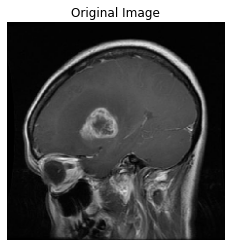

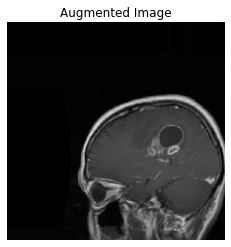

In [ ]:
import random 
import matplotlib.pyplot as plt

random_number = random.randint(0 , 32)
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

In [ ]:
model_5 = Sequential ([
                       Conv2D(10 , 3 , activation="relu" ) ,
                       MaxPool2D() ,  
                       Conv2D(10 , 3 , activation="relu") ,
                       MaxPool2D() ,
                       Conv2D(10 , 3 , activation="relu") , 
                       Flatten(), 
                       Dense(4 , activation="sigmoid")
                       
])

In [ ]:
model_5.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data_augmented , 
                                  epochs = 5 , 
                                  steps_per_epoch = len(train_data_augmented) , 
                                  validation_data = test_data , 
                                  validation_steps = len(test_data), 
                                  callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub" , 
                                                                           experiment_name = "3 layered aug model") 
                                  ])

ERROR:tensorflow:Failed to start profiler: Another profiler is running.


ERROR:tensorflow:Failed to start profiler: Another profiler is running.


saving to : tensorflow_hub/3 layered aug model/20210720-044431)
Epoch 1/5
 1/90 [..............................] - ETA: 37s - loss: 1.4516 - accuracy: 0.0000e+00ERROR:tensorflow:Failed to start profiler: Another profiler is running.


ERROR:tensorflow:Failed to start profiler: Another profiler is running.


90/90 [==============================] - 38s 421ms/step - loss: 1.3651 - accuracy: 0.3446 - val_loss: 1.3764 - val_accuracy: 0.2513
Epoch 2/5
90/90 [==============================] - 38s 423ms/step - loss: 1.3652 - accuracy: 0.3648 - val_loss: 1.4791 - val_accuracy: 0.2157
Epoch 3/5
90/90 [==============================] - 38s 428ms/step - loss: 1.3719 - accuracy: 0.3429 - val_loss: 1.4412 - val_accuracy: 0.2259
Epoch 4/5
90/90 [==============================] - 38s 418ms/step - loss: 1.3248 - accuracy: 0.4042 - val_loss: 1.3982 - val_accuracy: 0.2589
Epoch 5/5
90/90 [==============================] - 39s 432ms/step - loss: 1.3073 - accuracy: 0.3666 - val_loss: 1.4322 - val_accuracy: 0.3122


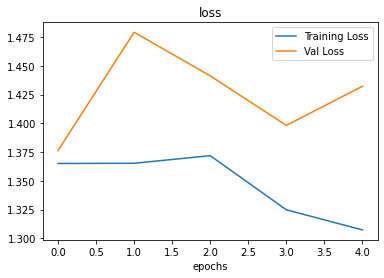

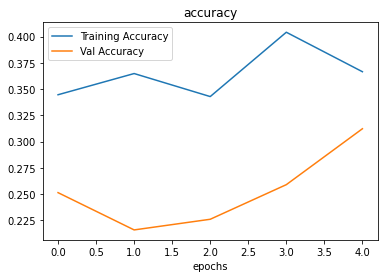

In [ ]:
plot_loss_curves(history_5)